# Digital Image Processing - AB1 (2018.1)

In [1]:
from dip import *
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

folder = '2018_1_AB1'


## Q1 - Criação de imagens

Degradê (do francês dégradé) ou gradiente de cor é uma sequência de tons 
contínuos, podendo ser limitado ou ilimitado. Ou seja, é a área onde duas 
ou mais cores são sobrepostas, cada uma com suas intensidades, formando 
uma transição suave entre as cores, no sentido de apresentar aspecto em 3D. 
Fonte: wikipedia.

Criar uma imagem 100x100 contendo uma variação linear gradual (degradê)
em escala de cinza (de 0 a 255), assim como ilustrado na imagem 
'degrade_theta_45_deg.png'. 
A direção do degradê deve ser controlada interativamente por uma variável 
'theta' que determina o ângulo ao longo do qual ocorre o aumento de 
intensidade.

In [2]:
rows = 100
cols = 100
theta = 45
img = np.zeros((rows, cols), dtype=np.float64)
xx, yy = np.meshgrid(np.linspace(-cols/2, cols/2 - 1, cols),
                     np.linspace(-rows/2, rows/2 - 1, rows))
cv2.namedWindow('img', cv2.WINDOW_KEEPRATIO)
cv2.createTrackbar("theta", "img", theta, 360, doNothing)
while 0xFF & cv2.waitKey(1) != ord('q'):
    theta = cv2.getTrackbarPos("theta", "img")
    theta2 = np.deg2rad(theta) # convert theta from deg (int) to rad (float)
    img[:] = (xx * np.cos(theta2) - yy * np.sin(theta2))
    img = (img - img.min()) / (img.max() - img.min())
    img2 = scaleImage2_uchar(img)
    cv2.imshow('img', img2)
cv2.destroyAllWindows()
cv2.imwrite('degrade_theta_' + str(theta) + '_deg.png', img2)

plt.imshow(img2, cmap = 'gray')
plt.xlabel('Theta = ' + str(theta) + ' deg')
plt.show()

NameError: name 'np' is not defined

## Q2 - Criação de imagens aleatórias
Desenvolva o código que gera uma imagem 500x500 contendo 30 círculos 
de centróides e raios aleatoriamente distibuídos, assim como ilustrado
na imagem 'random-circles.png', que foi criada com os seguintes parâmetros:

$$\rho \in [10, 30]$$

$$x_c \in [0, cols]$$

$$y_c \in [0, rows]$$


True

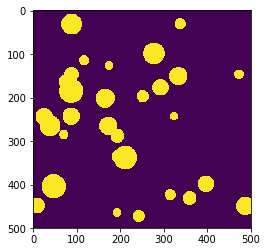

In [3]:
rows = 500
cols = 500
n = 30
np.random.seed(0)
xi = np.random.randint(0, cols, n)
yi = np.random.randint(0, rows, n)
radii = np.random.randint(10, 30, n)
img = np.zeros((rows, cols), dtype = np.uint8) != 0
for i in range(n):
    disk = createWhiteDisk2(rows, cols, xi[i], yi[i], radii[i]) != 0
    img = img | disk
plt.imshow(img)
cv2.imwrite('random-circles.png', scaleImage2_uchar(img))

## Q3 Filtragem
Desenvolva o código que insere ruído sal e pimenta a uma imagem
RGB, como por exemplo a imagem 'baboon.png' e que realize a atenuação desse
ruído, resultando numa imagem similar à 'baboon_cleaned.png'. Realize a inserção
de forma interativa, fazendo use de 'slider' tal que
$$\sigma \in [0, 1]$$
represente a 'densidade' de ruído sal e pimenta presente na imagem.

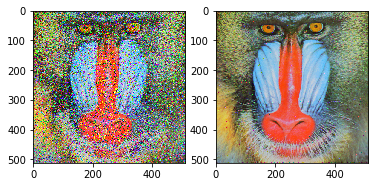

In [4]:
p = 10

bgr0 = cv2.imread(os.path.join(folder, 'baboon.png'), cv2.IMREAD_COLOR)
noise = np.random.rand(bgr0.shape[0], bgr0.shape[1], bgr0.shape[2])
cv2.namedWindow('img', cv2.WINDOW_KEEPRATIO)
cv2.createTrackbar('noiseDensity', 'img', p, 100, doNothing)
while 0xFF & cv2.waitKey(1) != ord('q'):
    p = cv2.getTrackbarPos('noiseDensity', 'img')
    bgr = bgr0.copy()
    bgr[noise > 1 - p/100] = 255
    bgr[noise < p/100] = 0
    bgr_clean = cv2.medianBlur(bgr, 3)
    cv2.imshow('img', bgr)
    cv2.imshow('clean', bgr_clean)
cv2.destroyAllWindows()
cv2.imwrite(os.path.join(folder, 'baboon_' + 'noise.png'), bgr)
cv2.imwrite(os.path.join(folder, 'baboon_' + 'cleaned.png'), bgr_clean)

plt.subplot('121'); plt.imshow(bgr2rgb(bgr))
plt.subplot('122'); plt.imshow(bgr2rgb(bgr_clean))
plt.show()

## Q4 Filtragem no domínio espacial
Realizar o borramento interativamente da imagem $I(x,y)$ 'messi.jpg' usando um kernel Gaussiano $H(x,y)$ onde o usuário poderá controlar o 'formato' da máscara Gaussiana de dimensão $60\times 60$:
$$G(x,y) = \exp \left[ - \left( \dfrac{(x-x_c)^2}{2\sigma_x^2} + \dfrac{(y-y_c)^2}{2\sigma_y^2} \right) \right ] \star I(x,y)$$

In [5]:
rows = 60
cols = 60
theta = 0
xc = 30
yc = 30
sx = 12
sy = 6
theta = 0

img = cv2.imread(os.path.join(folder, 'messi.jpg'), cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float64)

cv2.namedWindow('img', cv2.WINDOW_KEEPRATIO)
cv2.createTrackbar('sx', 'img', sx, int(rows), doNothing)
cv2.createTrackbar('sy', 'img', sy, int(cols), doNothing)
cv2.createTrackbar('theta', 'img', theta, 360, doNothing)

while 0xFF & cv2.waitKey(1) != ord('q'):
    sx = cv2.getTrackbarPos('sx', 'img')
    sy = cv2.getTrackbarPos('sy', 'img')
    theta = cv2.getTrackbarPos('theta', 'img')

    mask = create2DGaussian(rows, cols, xc, yc, sx + 1, sy + 1, theta)
    img2 = scaleImage2_uchar(cv2.filter2D(img, -1, mask, cv2.BORDER_DEFAULT))

    img2[img2.shape[0] - mask.shape[0]  : ,
         : mask.shape[1]] = scaleImage2_uchar(mask)
    cv2.imshow('img', scaleImage2_uchar(img2))
cv2.destroyAllWindows()

## Q5 Filtragem no domínio da frequência
Considerande a representação da onda quadrada periódica em termos da sua expansão em série de Fourier,
$$f(x) = \sum_{i=0}^{n} \left( \dfrac{1}{2i+1} \right)  \sin \left[ \left( 2i+1 \right) 2 \pi f x\right] $$
desenvolva um código que possibilite a observação da série e, para isso, crie uma imagem 400x400 e um trackbar para, interativamente, incrementar o número de coeficientes da expansão em série que serão considerados na reconstrução do sinal periódico.

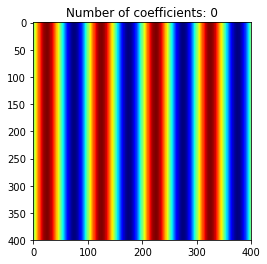

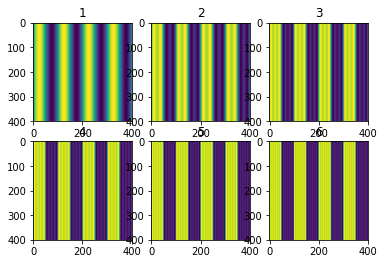

In [6]:
def compFourSerSqWave(height, width, freq, theta, n = 1):
    if n < 1:
        n = 1
    img = np.zeros((height, width), np.float32)
    for i in range(n):
        img = img + (1/(2*i + 1)) * createSineImage2(rows, 
                    cols, (2*i + 1) * freq, theta = 0)
    return img
    
rows = 400
cols = 400
f0 = 1/1e2
ncoeff = 0
cv2.namedWindow('img2', cv2.WINDOW_KEEPRATIO)
cv2.createTrackbar("ncoeff", "img2", ncoeff, 19, doNothing)
while 0xFF & cv2.waitKey(1) != ord('q'):
    ncoeff = cv2.getTrackbarPos('ncoeff', 'img2')
    img2 = compFourSerSqWave(rows, cols, f0, 0, ncoeff)
    cv2.imshow('img2', cv2.applyColorMap(scaleImage2_uchar(img2), 
                                         cv2.COLORMAP_JET))
cv2.destroyAllWindows()
plt.imshow(img2, cmap='jet')
plt.title('Number of coefficients: ' + str(ncoeff))
plt.show()

for i in range(7):
    plt.subplot('23' + str(i))
    plt.title(str(i))
    plt.imshow(compFourSerSqWave(rows, cols, f0, 0, i))
plt.show()